In [81]:
##Importing linraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Real Estate Dataset

In [82]:
#Read the data
data = pd.read_csv("Sacramentorealestatetransactions.csv")

fig = px.scatter(data,x='zip',y='price',color = 'type')
fig.show()

#Reset columns
data = data.set_index(['city', 'zip'])   

#rename zip column names
data.index.set_names(['city', 'zipcode'], inplace=True)
data.head(8)


street state  beds  baths  sq__ft  \
city       zipcode                                                   
SACRAMENTO 95838           3526 HIGH ST    CA     2      1     836   
           95823            51 OMAHA CT    CA     3      1    1167   
           95815         2796 BRANCH ST    CA     2      1     796   
           95815       2805 JANETTE WAY    CA     2      1     852   
           95824        6001 MCMAHON DR    CA     2      1     797   
           95841     5828 PEPPERMILL CT    CA     3      1    1122   
           95842    6048 OGDEN NASH WAY    CA     3      2    1104   
           95820          2561 19TH AVE    CA     3      1    1177   

                           type                     sale_date  price  \
city       zipcode                                                     
SACRAMENTO 95838    Residential  Wed May 21 00:00:00 EDT 2008  59222   
           95823    Residential  Wed May 21 00:00:00 EDT 2008  68212   
           95815    Residential  Wed May 21 00:00:00 EDT 2008  68880   
           95815    Residential  Wed May 21 00:00:00 EDT 2008  69307   
           95824    Residential  Wed May 21 00:00:00 EDT 2008  81900   
           95841          Condo  Wed May 21 00:00:00 EDT 2008  89921   
           95842    Residential  Wed May 21 00:00:00 EDT 2008  90895   
           95820    Residential  Wed May 21 00:00:00 EDT 2008  91002   

                     latitude   longitude  
city       zipcode                         
SACRAMENTO 95838    38.631913 -121.434879  
           95823    38.478902 -121.431028  
           95815    38.618305 -121.443839  
           95815    38.616835 -121.439146  
           95824    38.519470 -121.435768  
           95841    38.662595 -121.327813  
           95842    38.681659 -121.351705  
           95820    38.535092 -121.481367

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 985 entries, ('SACRAMENTO', 95838) to ('EL DORADO HILLS', 95762)
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   state      985 non-null    object 
 2   beds       985 non-null    int64  
 3   baths      985 non-null    int64  
 4   sq__ft     985 non-null    int64  
 5   type       985 non-null    object 
 6   sale_date  985 non-null    object 
 7   price      985 non-null    int64  
 8   latitude   985 non-null    float64
 9   longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 83.6+ KB


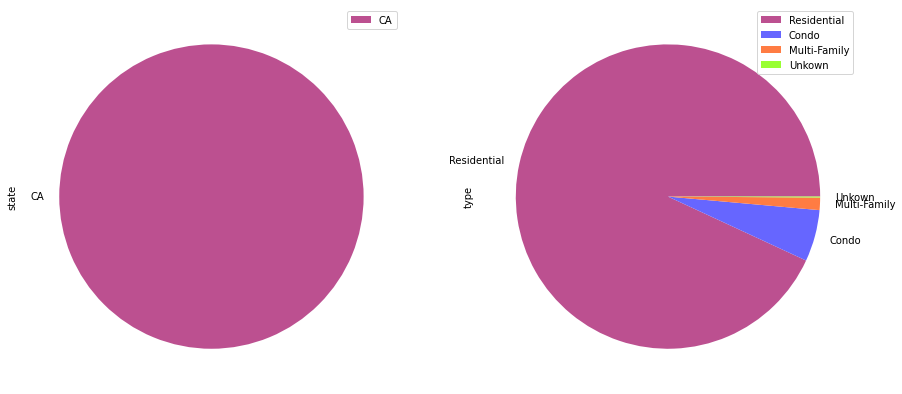

In [84]:
#Vizualizing how the categorical variables are distribted across the dataset.
f, axes = plt.subplots(1,2, figsize=(15,15))
axe = axes.ravel()
colors = ['#bc5090', '#6666ff','#ff7c43','#99ff33','#f95d6a','#ffff00']
for i, col in enumerate(['state','type']):
    df = pd.DataFrame(data[col].value_counts())
    df.plot.pie(y=col, ax=axe[i],colors=colors)
    
plt.show();


In [85]:
tmp = data.groupby('city').mean().round(2)
tmp = tmp[['sq__ft','price']]
tmp.reset_index(inplace = True)

fig = px.bar(tmp,x='city',y='sq__ft',color = 'sq__ft')
fig.show()
tmp


,city,sq__ft,price
0,ANTELOPE,1716.64,232496.39
1,AUBURN,898.60,405890.80
2,CAMERON PARK,224.00,267944.44
3,CARMICHAEL,1553.10,295684.75
4,CITRUS HEIGHTS,1308.69,187114.91
5,COOL,1457.00,300000.00
6,DIAMOND SPRINGS,1300.00,216033.00
7,EL DORADO,1332.00,247000.00
8,EL DORADO HILLS,233.43,491698.96
9,ELK GROVE,1848.73,271157.69


In [86]:
#removing the outlier
tmp = tmp.loc[tmp["sq__ft"] <3500 ]
fig = px.bar(tmp,x='city',y='sq__ft',color = 'sq__ft')
fig.show()

In [87]:
print(data.index.unique(level = 0).tolist())

['SACRAMENTO', 'RANCHO CORDOVA', 'RIO LINDA', 'CITRUS HEIGHTS', 'NORTH HIGHLANDS', 'ANTELOPE', 'ELK GROVE', 'ELVERTA', 'GALT', 'CARMICHAEL', 'ORANGEVALE', 'FOLSOM', 'MATHER', 'POLLOCK PINES', 'GOLD RIVER', 'EL DORADO HILLS', 'RANCHO MURIETA', 'WILTON', 'GREENWOOD', 'FAIR OAKS', 'CAMERON PARK', 'LINCOLN', 'PLACERVILLE', 'MEADOW VISTA', 'ROSEVILLE', 'ROCKLIN', 'AUBURN', 'LOOMIS', 'EL DORADO', 'PENRYN', 'GRANITE BAY', 'FORESTHILL', 'DIAMOND SPRINGS', 'SHINGLE SPRINGS', 'COOL', 'WALNUT GROVE', 'GARDEN VALLEY', 'SLOUGHHOUSE', 'WEST SACRAMENTO']


In [88]:
fig = px.bar(tmp,x='city',y='price',color = 'price')
fig.show()

In [89]:
fig = px.scatter(tmp,x='sq__ft',y='price',color = 'price')
fig.show()

In [90]:
#Vizualize how the categorical variables relate to the price variable

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2
)

# fig = go.Figure(data=[go.Histogram(x=x)])# Add traces
fig.add_trace(go.Box(x=data['beds'].values,y=data['price']), row=1, col=1)
fig.add_trace(go.Box(x=data['baths'].values,y=data['price']), row=1, col=2)
fig.add_trace(go.Box(x=data['type'].values,y=data['price']), row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Price")

# Update xaxis properties
fig.update_xaxes(title_text="Beds", row=1, col=1)
fig.update_xaxes(title_text="Baths", row=1, col=2)
fig.update_xaxes(title_text="Type", row=2, col=1)


fig.update_layout(title_text="How Categorical Variables Compare to Price", height=1000,showlegend= False)
fig.show()


In [91]:
#Plot of how the price variable is distributed.

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=data.price.values.tolist(),
    histnorm='percent',
    marker_color='#a05195'))
fig.update_layout(
    title_text='Price Variable Distribution', 
    xaxis_title_text='Price', 
    yaxis_title_text='Count',
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.show()

# Credit Data

In [92]:
#Read the data
data = pd.read_csv("credit-data-non-null.csv")
data

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.000627,76,0,60.000000,0.0,5,0,0,0,0.0
149996,0,0.236450,29,0,349.000000,0.0,3,0,0,0,0.0
149997,0,0.037548,84,0,25.000000,1.0,5,0,0,0,0.0
149998,0,0.871976,50,0,4132.000000,0.0,11,0,1,0,3.0


In [93]:
def cap_value(x, cap):
    if x>cap:
        x = cap 
    return x

In [94]:
data['debt_ratio'] = data['debt_ratio'].apply(cap_value, cap=5)

In [95]:
data.tail(8)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
149992,0,1.000000,27,0,5.0,1.0,2,0,0,0,0.0
149993,0,0.977899,63,0,5.0,0.0,5,0,0,1,0.0
149994,0,0.022088,58,0,5.0,0.0,8,0,2,0,0.0
149995,0,0.000627,76,0,5.0,0.0,5,0,0,0,0.0
149996,0,0.236450,29,0,5.0,0.0,3,0,0,0,0.0
149997,0,0.037548,84,0,5.0,1.0,5,0,0,0,0.0
149998,0,0.871976,50,0,5.0,0.0,11,0,1,0,3.0
149999,0,0.246044,58,0,5.0,0.0,18,0,1,0,0.0


In [96]:
#Assuming that the "number_of_open_credit_lines_and_loans" column repesents the customers that went bad:
bad_cust = data.groupby('age')['number_of_open_credit_lines_and_loans'].aggregate(['count', 'sum']).reset_index()
bad_cust['percentage'] = round(bad_cust['count']*100 /bad_cust['sum'],2)
bad_cust

,age,count,sum,percentage
0,0,1,6,16.67
1,21,183,229,79.91
2,22,434,792,54.80
3,23,641,1454,44.09
4,24,816,2446,33.36
...,...,...,...,...
81,102,3,22,13.64
82,103,3,20,15.00
83,105,1,4,25.00
84,107,1,9,11.11


In [97]:
#Age group categorization
buckets = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
buckets_name = ['1', '2', '3', '4','5','6','7','8','9','10']

data['age_group'] = pd.cut(data['age'].values, buckets , labels = buckets_name)

data.groupby('age_group',as_index=True,sort=True).mean().head(8)


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
age_group,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.115646,3.760789,26.943851,1.595147,1.003759,2768.533885,4.706982,1.515757,0.225435,1.456354,0.319792
4,0.098196,9.831877,35.895353,0.448950,1.055588,4985.694729,7.401249,0.302067,0.915568,0.251654,0.996425
5,0.082570,7.079515,45.720353,0.411108,1.169752,6244.095556,8.652168,0.208094,1.223421,0.181208,1.268259
6,0.061742,6.233547,55.398954,0.366000,1.322862,6289.477217,9.591651,0.177182,1.258116,0.157071,0.768862
7,0.034714,3.955698,64.840213,0.210655,1.531124,5563.388820,9.426524,0.077961,1.100715,0.067678,0.331170
8,0.023465,3.666804,74.907480,0.129528,1.539797,4198.925984,8.442598,0.043465,0.742913,0.038504,0.172047


In [98]:
tmp = data.groupby('age_group')['revolving_utilization_of_unsecured_lines'].aggregate('mean').reset_index()
df = pd.DataFrame(tmp)
df.columns = ['age_group', 'mean']

fig = px.line(df, x='age_group',y='mean', title="Revolving_utilization_of_unsecured_lines Mean against Age groups")
fig.show()

tmp = data.groupby('age_group')['monthly_income'].aggregate('mean').reset_index()
df = pd.DataFrame(tmp)
df.columns = ['age_group', 'mean']

fig = px.line(df, x='age_group',y='mean', title="Monthly Income Mean against Age groups")
fig.show()

In [99]:
data = data.set_index(['number_real_estate_loans_or_lines', 'serious_dlqin2yrs'])   
data.head(8)

revolving_utilization_of_unsecured_lines  \
number_real_estate_loans_or_lines serious_dlqin2yrs                                             
6                                 1                                                  0.766127   
0                                 0                                                  0.957151   
                                  0                                                  0.658180   
                                  0                                                  0.233810   
1                                 0                                                  0.907239   
                                  0                                                  0.213179   
0                                 0                                                  0.754464   
4                                 0                                                  0.189169   

                                                     age  \
number_real_estate_loans_or_lines serious_dlqin2yrs        
6                                 1                   45   
0                                 0                   40   
                                  0                   38   
                                  0                   30   
1                                 0                   49   
                                  0                   74   
0                                 0                   39   
4                                 0                   57   

                                                     number_of_time30-59_days_past_due_not_worse  \
number_real_estate_loans_or_lines serious_dlqin2yrs                                                
6                                 1                                                            2   
0                                 0                                                            0   
                                  0                                                            1   
                                  0                                                            0   
1                                 0                                                            1   
                                  0                                                            0   
0                                 0                                                            0   
4                                 0                                                            0   

                                                     debt_ratio  \
number_real_estate_loans_or_lines serious_dlqin2yrs               
6                                 1                    0.802982   
0                                 0                    0.121876   
                                  0                    0.085113   
                                  0                    0.036050   
1                                 0                    0.024926   
                                  0                    0.375607   
0                                 0                    0.209940   
4                                 0                    0.606291   

                                                     monthly_income  \
number_real_estate_loans_or_lines serious_dlqin2yrs                   
6                                 1                          9120.0   
0                                 0                          2600.0   
                                  0                          3042.0   
                                  0                          3300.0   
1                                 0                         63588.0   
                                  0                          3500.0   
0                                 0                          3500.0   
4                                 0                         23684.0   

                                                     number_of_open_credit_lines_and_loans  \
numb

In [100]:
tmp = round(data.groupby(['number_real_estate_loans_or_lines','serious_dlqin2yrs']).mean())
tmp.reset_index(inplace = True)

tmp.head()

,number_real_estate_loans_or_lines,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,0,0,3.0,52.0,0.0,1.0,4015.0,6.0,0.0,0.0,1.0
1,0,1,3.0,42.0,4.0,1.0,3423.0,5.0,4.0,3.0,1.0
2,1,0,7.0,54.0,0.0,1.0,5374.0,9.0,0.0,0.0,1.0
3,1,1,4.0,49.0,1.0,1.0,4977.0,9.0,1.0,0.0,1.0
4,2,0,10.0,52.0,0.0,1.0,6933.0,11.0,0.0,0.0,1.0


In [101]:
fig = px.bar(tmp,x='serious_dlqin2yrs',y='number_real_estate_loans_or_lines',color = 'number_real_estate_loans_or_lines')
fig.show()

fig = px.bar(tmp,x='number_real_estate_loans_or_lines',y='monthly_income',color = 'monthly_income')
fig.show()

fig = px.bar(tmp,x='number_real_estate_loans_or_lines',y='debt_ratio',color = 'debt_ratio')
fig.show()



In [102]:
tmp = data.groupby('age_group')['revolving_utilization_of_unsecured_lines','monthly_income'].aggregate(['count','mean','max','min']).reset_index()
tmp

age_group revolving_utilization_of_unsecured_lines                          \
                                               count      mean      max  min   
0         1                                        0       NaN      NaN  NaN   
1         2                                        0       NaN      NaN  NaN   
2         3                                    10757  3.760789   8497.0  0.0   
3         4                                    24339  9.831877  22198.0  0.0   
4         5                                    35037  7.079515  20514.0  0.0   
5         6                                    34806  6.233547  50708.0  0.0   
6         7                                    27424  3.955698  11553.0  0.0   
7         8                                    12700  3.666804   8831.0  0.0   
8         9                                     4447  1.661255   2050.0  0.0   
9        10                                      476  0.132959      1.0  0.0   

  monthly_income                               
           count         mean        max  min  
0              0          NaN        NaN  NaN  
1              0          NaN        NaN  NaN  
2          10757  2768.533885   159791.0  0.0  
3          24339  4985.694729   251608.0  0.0  
4          35037  6244.095556  1560100.0  0.0  
5          34806  6289.477217  3008750.0  0.0  
6          27424  5563.388820  1794060.0  0.0  
7          12700  4198.925984   184903.0  0.0  
8           4447  3891.841916   629000.0  0.0  
9            476  3631.552521   203500.0  0.0

In [103]:
clust = data.groupby(['age_group','monthly_income'], as_index=False)['monthly_income'].sum()
df = clust.sort_values(['age_group', 'monthly_income'], ascending=[True, False]).groupby('age_group').head(5)
df.reset_index(inplace=True,drop=True,)
df

,age_group,monthly_income
0,1,3008750.0
1,1,1794060.0
2,1,1560100.0
3,1,1072500.0
4,1,835040.0
5,2,3008750.0
6,2,1794060.0
7,2,1560100.0
8,2,1072500.0
9,2,835040.0
